# PCS5022 - Redes Neurais e Aprendizado Profundo - 2024/2
 - Professor: Artur Jordão (@usp.br)
 - Aluno: Caio Azevedo (caio.aze@alumni.usp.br)

# Aula 1 - Lista de Exercícios 
- FUNDAMENTOS BASICOS DE MACHINE LEARNING

#### 1. O código abaixo apresenta um problema teórico grave. Qual? Como resolver? Crie um modelo preditivo (i.e., OLS, SVM, XGBoost) e analise o comportamento da performance preditiva do modelo antes e após resolver o problema.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from mycolorpy import colorlist as mcp

In [83]:
n_samples = 1000
n_features = 2
n_classes = 5

In [84]:
X = np.random.rand(n_samples, n_features)
y = np.random.randint(0,n_classes,size=n_samples)
#X, y = make_classification(n_samples=1000, n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1, n_classes=4,random_state=42)
y = np.eye(n_classes)[y]

In [85]:
#from sklearn import datasets
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#y = np.eye(n_classes)[y]


In [86]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.33 ,random_state=42)

In [88]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "SVM": SVC(kernel='linear', random_state=42, probability=True),
        "OLS (Logistic Regression)": LogisticRegression(random_state=42, multi_class='ovr', max_iter=200),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=10)
    }
    
    accuracies = {}
    
    for name, model in models.items():
        model.fit(X_train, np.argmax(y_train, axis=1))
        y_pred = model.predict(X_test)
        y_test_decoded = np.argmax(y_test, axis=1)
        accuracies[name] = accuracy_score(y_test_decoded, y_pred)
    
    return accuracies

In [89]:
accuracies = evaluate_models(X_train, X_test, y_train, y_test)

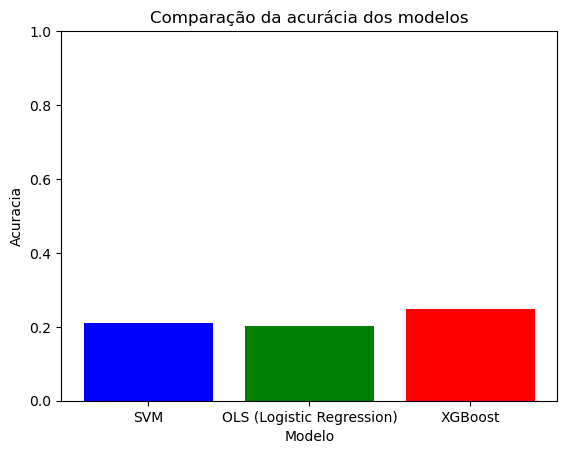

SVM: 0.21
OLS (Logistic Regression): 0.20
XGBoost: 0.25


In [90]:
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Acuracia')
plt.title('Comparação da acurácia dos modelos')
plt.ylim(0, 1)
plt.show()


for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}")

Resposta: 
- O código acima, apresenta um conjunto de dados onde as variáveis independentes são geradas aleatoriamente e cuja população é de 1000 objetos. Cada objeto possue duas features, como definido em:
X = np.random.rand(n_samples, n_features).
- A variável dependente, possue a mesma população das independentes, o que está correto, e ela representa cinco classes distintas. Essa definição é implementada em: **y = np.random.randint(0,n_classes,size=n_samples)**.
- A figura 1 ilustra as sentenças acima.
- Daqui em diante deparamos com um grave problema , conhecido como vazamento de dados ou *data leakage*. Esse problema se refere à inclusão de informações durante o treinamento do modelo que não estariam disponíveis durante a aplicação do modelo no mundo real. Nesse cenário deparamos com o vazamento de dados por contaminação ou validação imprópria, *Leakage through data contamination or improper validation*, e ele se manifesta em duas situações:

1. Na instrução **y = np.eye(n_classes)[y]**, que aplica a técnica de one-hot encoding, uma vez que estamos diante de um problema de classificaçao multiclasse. No entanto, essa técnica deve ser aplicada somente na amostra de treino. 
2. O mesmo problema se manifesta quando da normalização das features usando todo conjunto de dados, assim, informações da amostra de treino são levadas para amostra de teste.

Para resolver o problema deve-se inverter a ordem do preprocessamento, primeiro com com a criação das amostras de treino e teste, só então, aplica-se o one-hot enconding e a normalização, conforme apresentado na codificação abaixo.

In [91]:
def plot_chart(X,y, fig_number):
    print(X.shape, y.shape)
    plt.title('Fig. {} - População de {} elementos com duas features (A e B), com cinco classes.'.format(fig_number,len(X)))
    plt.scatter(X[:,0], X[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)
    plt.xlabel('feature A')
    plt.ylabel('feature B')
    plt.show()


def Z_score(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

    

In [92]:
X = np.random.rand(n_samples, n_features)
y = np.random.randint(0,n_classes,size=n_samples)
#X, y = make_classification(n_samples=1000, n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1, n_classes=4,random_state=42)



(1000, 2) (1000,)


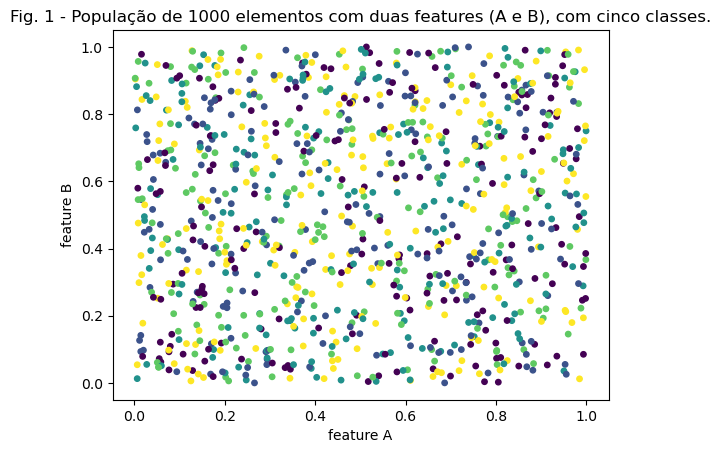

In [93]:
plot_chart(X,y,'1')

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.33 ,random_state=42)

(670, 2) (670,)


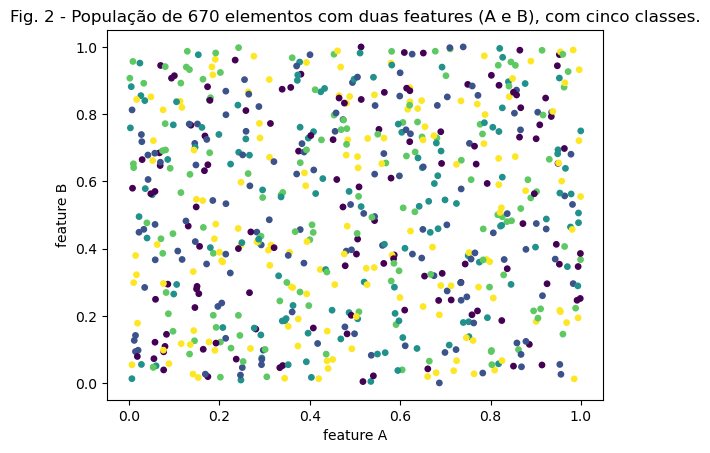

In [95]:
plot_chart(X_train,y_train,'2')

In [96]:
y_train[:5]

array([0, 0, 2, 0, 4])

In [97]:
y_train = np.eye(n_classes)[y_train]

In [98]:
y_train[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [99]:
X_train = Z_score(X_train)
X_test = Z_score(X_test)
y_test = np.eye(n_classes)[y_test]

In [100]:
accuracies = evaluate_models(X_train, X_test, y_train, y_test)

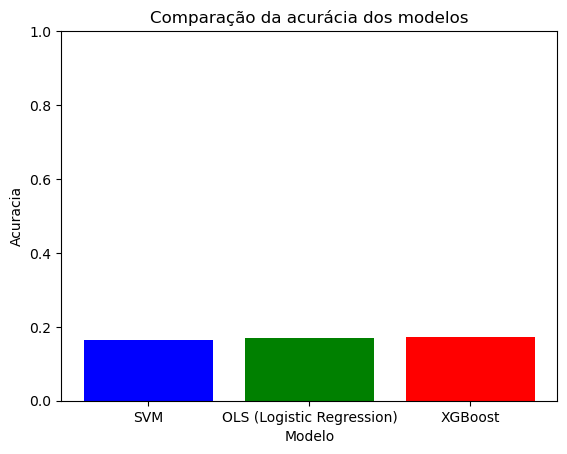

SVM: 0.16
OLS (Logistic Regression): 0.17
XGBoost: 0.17


In [101]:
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Acuracia')
plt.title('Comparação da acurácia dos modelos')
plt.ylim(0, 1)
plt.show()


for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}")

**Conclusão**: Percebe-se que a acurácia dos modelos antes da correção é maior. No entanto, essa suposta eficiência é confiável, devido o vazamento de dados. Esse vazamento pode levar a um desempenho excessivamente otimista do modelo, tornando-o pouco confiável e potencialmente prejudicial em ambientes de produção.
- Atenção: a baixa acurácia apresentada, por volta de 20%, é por conta do dados de entrada serem totalmente aleatórios e sem relação detectável. Ao testar um conjunto de dados com melhor features engineering os resultados são bem melhores.

#### 2. Gere dados aleatórios com dimensão n × m para k categorias (classes) e m = 2. A partir dos dados gerados realize as seguintes tarefas. 
 - (i) Calcule a média das amostras; 
 - (ii) Calcule a média das amostras de cada classe; 
 - (iii) Calcule a amostra média e a amostra média de cada classe; 
 - (iv) Para cada classe, identifique qual a amostra mais distante da amostra média da classe. 
 
 - Expresse formalmente a solução dos itens (i)-(iv). 

In [102]:
n_samples = 500
m_features = 2
k_classes = 4

X = np.random.rand(n_samples, m_features)
y = np.random.randint(0,k_classes,size=n_samples)


#X = [[3,8],[4,6],[2,4],[1,3],[1,4],[3,5],[2,7],[2,5]]
#y = [0,3,2,1,2,3,1,0]



# Converter para DataFrame para manipulação mais fácil
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y


In [103]:
class_samples = df[df['Class'] == 1][['Feature 1', 'Feature 2']].values
class_samples = df[df['Class'] == 1].iloc[:, :-1].values


class_samples

array([[0.23688104, 0.23199401],
       [0.39079954, 0.8164592 ],
       [0.16609881, 0.48974485],
       [0.66572763, 0.48333074],
       [0.49809287, 0.77190737],
       [0.03284216, 0.91693404],
       [0.50227492, 0.95623806],
       [0.67982729, 0.75635299],
       [0.89139411, 0.17080347],
       [0.94855147, 0.7533841 ],
       [0.09168715, 0.71029724],
       [0.48943144, 0.3121365 ],
       [0.45617268, 0.41501862],
       [0.18477372, 0.26946614],
       [0.76526161, 0.12280176],
       [0.66846496, 0.74851254],
       [0.76060607, 0.07228763],
       [0.94141966, 0.00308198],
       [0.93878738, 0.07730234],
       [0.3727332 , 0.71530149],
       [0.02871167, 0.2988924 ],
       [0.53135047, 0.70126838],
       [0.63247014, 0.84250129],
       [0.42105789, 0.00858127],
       [0.62185367, 0.66207064],
       [0.53890933, 0.78681905],
       [0.26320363, 0.50451286],
       [0.96307793, 0.71371565],
       [0.60136167, 0.20677704],
       [0.86704394, 0.54532849],
       [0.

In [104]:
# Calcular a distância euclidiana da amostra média de cada classe
def euclidean_distance(x, y):
    distance= np.sqrt(np.sum(np.square(x-y)))
    return distance



In [105]:
def compute_means(X, df):
    # Calcular a média das amostras
    sample_mean = np.mean(X)
    
    # Calcular a amostra média
    mean_entire_dataset = np.mean(X, axis=0)
    
    # Calcular a amostra média para cada classe
    mean_per_class = df.groupby('Class').mean()

    distances = {}
    most_distant_samples = {}

    for class_label, mean_values in mean_per_class.iterrows():
        #class_samples = df[df['Class'] == class_label][['Feature 1', 'Feature 2']].values
        class_samples = df[df['Class'] == 1].iloc[:, :-1].values
        mean_sample = mean_values.values
        dist = [euclidean_distance(sample, mean_sample) for sample in class_samples]
        
        distances[class_label] = dist
        most_distant_samples[class_label] = class_samples[np.argmax(dist)]



    return sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples

def print_means(sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples):
    # Exibir os resultados
    print("Média das amostras (sample_mean): {}\n".format(sample_mean))
    # Calcular e exibir a média das amostras de cada classe
    for class_label, mean_values in mean_per_class.iterrows():
        print("A média da amostra, classe:{} é {}".format(class_label, np.mean(mean_values)))


    print("\nAmostra média da população é (mean_entire_dataset): {}".format(mean_entire_dataset))
    print("\nAmostra média de cada classe (mean_per_class):")
    print(mean_per_class)

    print("\nDistância euclidiana da amostra média de cada classe:")
    for class_label, dist in distances.items():
        print(f"Classe {class_label}: {np.mean(dist)}")

    print("\nAmostra mais distante de cada classe da sua amostra média:")
    for class_label, sample in most_distant_samples.items():
        print(f"Classe {class_label}: {sample}")


In [106]:
sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples = compute_means(X, df)
print_means(sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples)

Média das amostras (sample_mean): 0.5086032870074159

A média da amostra, classe:0 é 0.509109522434678
A média da amostra, classe:1 é 0.4901943457647914
A média da amostra, classe:2 é 0.5248100167693253
A média da amostra, classe:3 é 0.5081131884619325

Amostra média da população é (mean_entire_dataset): [0.51093658 0.50627   ]

Amostra média de cada classe (mean_per_class):
       Feature 1  Feature 2
Class                      
0       0.514088   0.504131
1       0.468723   0.511666
2       0.532489   0.517131
3       0.525564   0.490663

Distância euclidiana da amostra média de cada classe:
Classe 0: 0.40049319414897805
Classe 1: 0.3986895878819132
Classe 2: 0.4013909011767493
Classe 3: 0.4024161671319264

Amostra mais distante de cada classe da sua amostra média:
Classe 0: [0.94141966 0.00308198]
Classe 1: [0.94141966 0.00308198]
Classe 2: [0.03590565 0.05942495]
Classe 3: [0.03590565 0.05942495]


In [107]:
#= (Σ(xᵢⱼ) / nᵢ)
#Amostra média = (Σ(xᵢⱼ) / n) 

#### Solução Formal

1. *Média das amostras*: A média das amostras é calculada pelo somatório duplo de todas as features de \(X\). 
- Equação: Média das amostras: $\text{Média}(X) = \frac{\sum_{i=1}^{m} \sum_{j=1}^{n} X_{ij}}{m \times n} $  
- Onde:
    - xᵢⱼ é o valor da feature j na amostra i
    - n é o número de amostras (linhas) de \(X\)
    - m é o número de features (colunas) de \(X\).
    - m x n é o número total de elementos em \(X\).
- **Dúvida: Qual a interpretação desse resultado 'escalar' em um cenário de representações vetoriais ?**

2. *Média de cada classe*: A média das amostras para cada classe é calculada somando os valores de cada feature em todas as amostras daquela classe e dividindo pela quantidade de amostras na classe.
- Equação: Média da amostra para classe c: $\forall c \in y, \text{Média}(X_{c}) = \frac{\sum_{j=1}^{n} X_{im}}{n_{i}} $  
- Onde:
    - $\text X_{im} $ é o valor da feature *m* na amostra i da classe c
    - nᵢ é o número de amostras na classe c
    - **Dúvida: Qual a interpretação desse resultado 'escalar' em um cenário de representações vetoriais ?**

3. *Amostra Média*: A amostra média representa a posição central de todas as amostras no espaço n-dimensional. É calculada somando os valores de cada feature em todas as amostras e dividindo pela quantidade total de amostras para cada feature *m*.
- Equação: $\forall m \in X, \text{Amostra Média}(X_{n \times m}) = \frac{\sum_{j=1}^{n} X_{im}}{n} $
- Onde:
    - $\text X_{im} $ é o valor da feature *m* na amostra i 
    - n é o número de amostras (linhas)
    - **Dúvida: faz sentido essa definição formal ?**
    
3. *Amostra Média de cada classe*: Representa a posição central das amostras de uma determinada classe no espaço n-dimensional. É calculada somando os valores de cada feature em todas as amostras dessa classe e dividindo pela quantidade total de amostras para cada feature *m* dessa mesma classe.
- Equação: $\forall m \in X  $ e, $\forall c \in y, \text{Amostra Média}(X_{c \times n \times m}) = \frac{\sum_{j=1}^{n} X_{im}}{n_{i}} $
- Onde:
    - $\text X_{im} $ é o valor da feature *m* na amostra i da classe c
    - nᵢ é o número de amostras (linhas) na classe c

#### 3. Gere dados aleatórios com dimensão n × m, com m = 2. A partir desses dados mostre o espaço de características, destacando a amostra média geral e a amostra média por classe. 

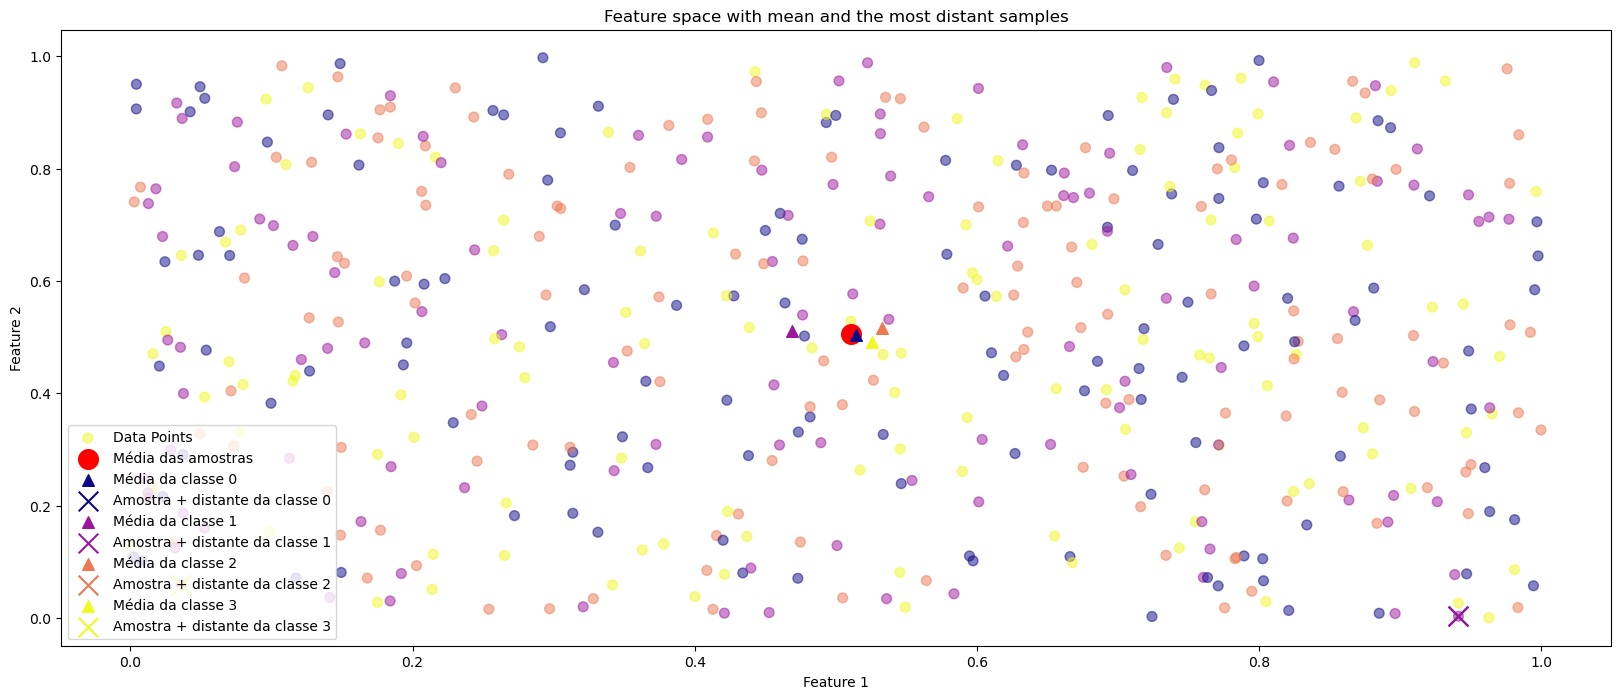

In [108]:
plt.figure(figsize=(20, 8))

colors = mcp.gen_color(cmap="plasma",n=4) #get the colors from the color map in use
# Plot do dataset
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Class'], cmap='plasma',  s=50, alpha=0.5, label='Data Points')

# Plot da amostra média do dataset
plt.scatter(mean_entire_dataset[0], mean_entire_dataset[1], color='red',  s=200, label='Média das amostras')

# Plot das amostras médias de cada classe e as amostras mais distantes de suas respectivas médias
for i, (class_label, mean_values) in enumerate(mean_per_class.iterrows()):
    plt.scatter(mean_values['Feature 1'], mean_values['Feature 2'], color=colors[i], s=70, marker='^', label=f'Média da classe {class_label}')
    most_distant_sample = most_distant_samples[class_label]
    plt.scatter(most_distant_sample[0], most_distant_sample[1], color=colors[i],  s=200, marker='x', label=f'Amostra + distante da classe {class_label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature space with mean and the most distant samples')
plt.legend()
plt.show()


#### 4. Faça o mesmo que o exercício anterior, porém agora utilize m > 4. Como mostrar o espaço de características quando m é arbitrariamente grande?

##### R: Para o *feature space* quando a quantidade dessas featues é maior que 3, é necessário recorrer à técnicas de redução de dimensionalidade, que objetiva reducir o numero de features de um dataset buscando preservar o máximo de informação possível. Tão ou mais importante que permitir a visualização desse espaço, essas técnicas ajudam a melhorar o desempenho de modelos de machine learning, por exemplo, reduzindo overfitting, melhorando a acurácia, e reduzindo custos computacionais. Dentre os métodos de redução de dimensionalidade temos PCA - Principal Component Analysis, Linear Discriminant Analysis (LDA), e t-Distributed Stochastic Neighbor Embedding (t-SNE).

In [109]:
n_samples = 500
m_features = 6
k_classes = 4

X = np.random.rand(n_samples, m_features)
y = np.random.randint(0,k_classes,size=n_samples)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])
df['Class'] = y


In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# Create a DataFrame for the reduced dataset
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_reduced['Class'] = y

In [112]:
sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples = compute_means(X_reduced, df_reduced)
print_means(sample_mean, mean_entire_dataset, mean_per_class, distances, most_distant_samples)

Média das amostras (sample_mean): 1.3100631690576846e-17

A média da amostra, classe:0 é -0.012478166800591689
A média da amostra, classe:1 é 0.021566646451744474
A média da amostra, classe:2 é -0.012666406230921698
A média da amostra, classe:3 é 0.004555438118239665

Amostra média da população é (mean_entire_dataset): [ 1.21680443e-16 -9.45910017e-17]

Amostra média de cada classe (mean_per_class):
            PC1       PC2
Class                    
0      0.000137 -0.025093
1      0.003820  0.039313
2     -0.022110 -0.003223
3      0.019214 -0.010103

Distância euclidiana da amostra média de cada classe:
Classe 0: 0.40095944706788395
Classe 1: 0.3979183420598846
Classe 2: 0.4000004124503614
Classe 3: 0.3994647542702814

Amostra mais distante de cada classe da sua amostra média:
Classe 0: [0.51491398 0.59259693]
Classe 1: [-0.76316527 -0.27235232]
Classe 2: [0.51491398 0.59259693]
Classe 3: [-0.76316527 -0.27235232]


In [130]:
df = df_reduced

0     -0.357305
1     -0.098894
2      0.237537
3     -0.035211
4     -0.069883
         ...   
495   -0.160592
496   -0.018944
497    0.099600
498   -0.138197
499   -0.356985
Name: PC2, Length: 500, dtype: float64

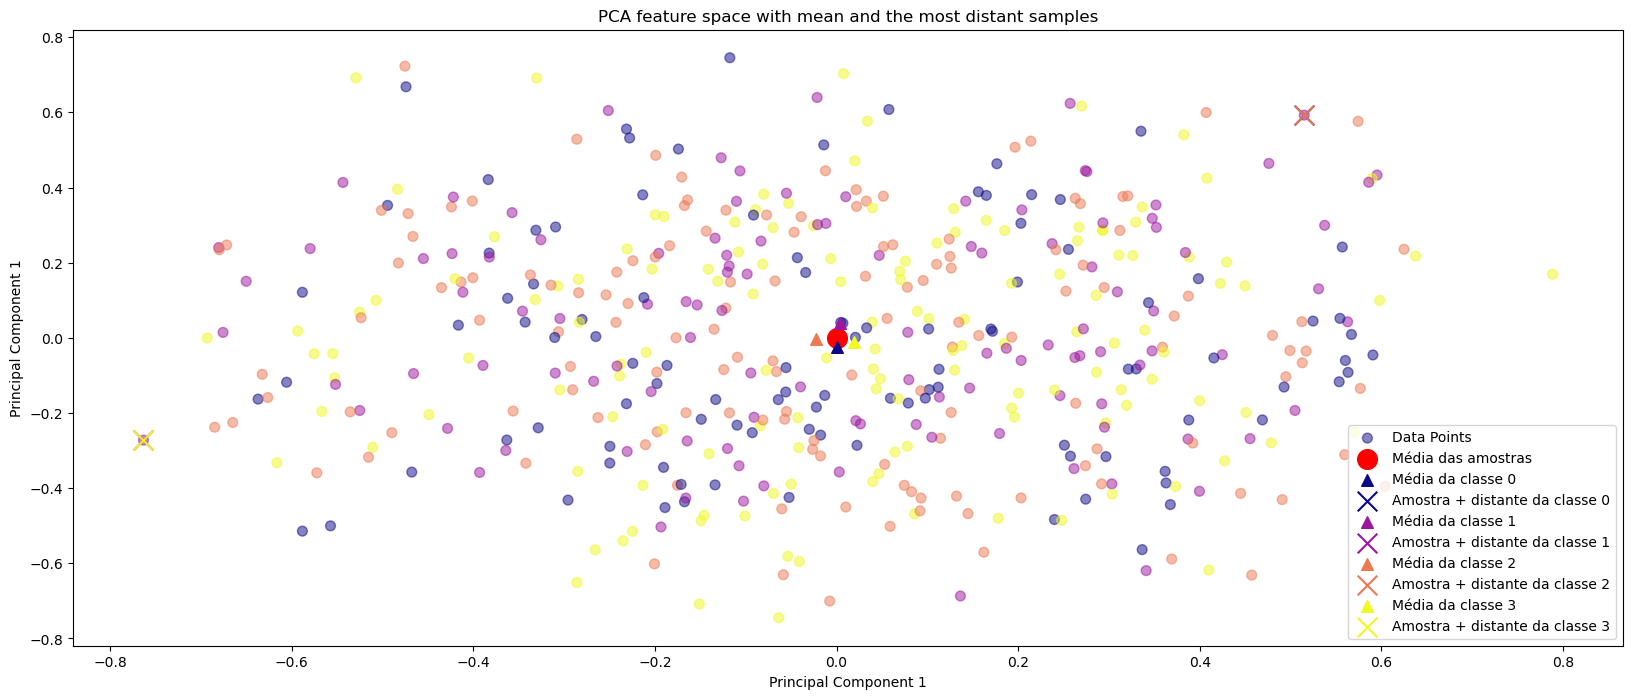

In [131]:
plt.figure(figsize=(20, 8))

colors = mcp.gen_color(cmap="plasma",n=4) #get the colors from the color map in use
# Plot do dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Class'], cmap='plasma',  s=50, alpha=0.5, label='Data Points')

# Plot da amostra média do dataset
plt.scatter(mean_entire_dataset[0], mean_entire_dataset[1], color='red',  s=200, label='Média das amostras')

# Plot das amostras médias de cada classe e as amostras mais distantes de suas respectivas médias
for i, (class_label, mean_values) in enumerate(mean_per_class.iterrows()):
    plt.scatter(mean_values['PC1'], mean_values['PC2'], color=colors[i], s=70, marker='^', label=f'Média da classe {class_label}')
    most_distant_sample = most_distant_samples[class_label]
    plt.scatter(most_distant_sample[0], most_distant_sample[1], color=colors[i],  s=200, marker='x', label=f'Amostra + distante da classe {class_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')
plt.title('PCA feature space with mean and the most distant samples')
plt.legend()
plt.show()

#### 5. Um problema envolvendo a solução analítica da regressão linear, $  (X^TX)^{-1} X^TY $   , em que os dados de treinamento não podem apresentar mais features (m) do que amostras (n) – the sample size problem. Como resolver esse problema sem utilizar a otimização de gradient descent?

Também denominado do problema **"big-p, little-n"** (Page 649, The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2016), onde em um conjunto de dados existem mais colunas ou amostras (p), ou na nossa notação *m*, que linhas ou amostras (n), a solução analítica com regressão linear se mostra inviável por conta do processamento de matrizes. 

Algumas abordagens podem ser adotadas para contornar essa situação, e essas soluções estão relacionadas à preparação dos dados e técnicas de modelagem, por exemplo:

- **Regularização**: Técnicas como Lasso (L1) ou Ridge (L2) pode ajudar uma vez que grandes coeficientes são penalizados, e assim, algumas dimensões são desconsideradas.
- **Redução de dimensionalidade**: Metodos como Principal Component Analysis (PCA) ou t-SNE reduzem o feature space preservando informações importantes.
- **Seleção de features**: Com a identificação e permanencia apenas das features mais relevantes. Essa relevancia é calculada com base do maior impacto para variável dependente, por exemplo com coeficiente de correlação de Pearson, 
- **Métodos Ensemble**: Algoritmos probabilisticos como Random Forests lidam bem com dados de alta dimensionalidade, uma vez que eles não fazem operações matriciais.


#### 6. Suponha um cenário hipotético em que só podemos aprender um modelo usando um determinado número de amostras k, onde k ≪ n. Como lidar com essa restrição evitando uma solução trivial de amostrar exemplos aleatoriamente?


#### R: Não entendi a pergunta !!!

# referencias:
 - Sepideh Mahabadi and Stojan Trajanovski. Core-sets for fair and diverse data summarization. In Neural Information Processing Systems (NeurIPS), 2023.
 - https://medium.com/@krithiqkrish/understanding-data-leakage-in-machine-learning-a-comprehensive-guide-16b39198b893#:~:text=It%20occurs%20when%20the%20training%20or%20validation%20data,future%20data%2C%20leading%20to%20overfitting%20and%20unreliable%20predictions.
 - https://machinelearningmastery.com/data-preparation-without-data-leakage/ 
 - https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/
 - https://finalverse.com.br/o-que-e-reducao-de-dimensionalidade-significado-tecnicas-e-exemplos/